# EECS 127 HW2 Analysis of calendar days

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import pandas as pd

Part 1: We first form the matrix X.

In [2]:
start = '2003-11-01'
end = '2013-10-31'

date_str_lst = pd.date_range(start=start, end=end)
date_arr = [[d.year, d.month, d.day] for d in date_str_lst]
X = np.array(date_arr)
print(X)

[[2003   11    1]
 [2003   11    2]
 [2003   11    3]
 ..., 
 [2013   10   29]
 [2013   10   30]
 [2013   10   31]]


Part 2: We compute the SVD, and associate each right singular vector to its corresponding singular value. Note that, for better interpretation, we negated $U$ and $V_T$, which still form a valid SVD for $X$. We do this because this particular SVD returned by Numpy is negative.

In [3]:
U, d, V_T = np.linalg.svd(X, full_matrices=False)
U, V_T = -U, -V_T

Part 3: the rank of $X$ is 3, since it has 3 columns and they are all linearly independent. Compared to the number of data, the rank is quite low.

Part 4: Plotting the left singular vectors. We note the following:

1. $v_1$ represents years, indicated by each step
2. $v_2$ represents days, with faster repetition
3. $v_3$ represents months, indicated by 12 dots; the 10 peaks correspond to 10 years

In [4]:
v_1,v_2,v_3 = U[:,0], U[:,1], U[:,2]

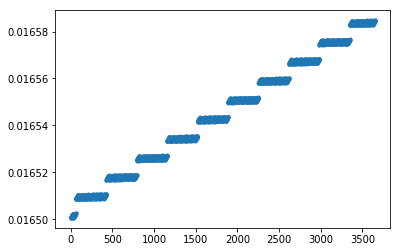

In [5]:
plt.plot(v_1, linestyle="None", marker='.')
plt.show()

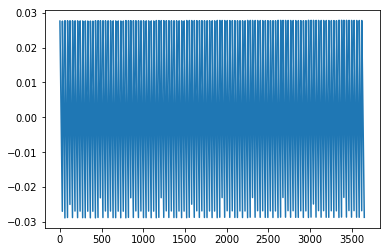

In [6]:
plt.plot(v_2)
plt.show()

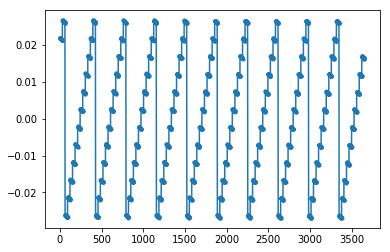

In [7]:
# 12 dots = 12 months, 10 peaks = 10 years
plt.plot(v_3, marker='.')
plt.show()

Part 5: from part 4, we know that the 3rd singular vector corresponds to months, which appears in the 2nd column of our data. This implies the right singular vector will of the form $[0, 1, 0]$. The middle 1 places an emphasis on the month.

In [8]:
V_T[2]

array([-0.00320943,  0.99998312, -0.00484354])

Part 6: We expect the ratio to increase, since the maximal year will increase while the maximal month remain the same.

In [9]:
d[0] / d[2]

582.24364688173534

In [10]:
start2 = '2003-11-01'
end2 = '2053-10-31'

date_str_lst2 = pd.date_range(start=start2, end=end2)
date_arr2 = [[d.year, d.month, d.day] for d in date_str_lst2]
X2 = np.array(date_arr2)
U2, d2, V_T2 = np.linalg.svd(X2)
d2[0] / d2[2]

588.03191342505409